# **0.Introduction**
<span style="font-size:25px;">**Name:** Yuting Deng<br><br>**Theme:** Analyzing Differences in Food Consumption Across Income Groups in Japan: An Application of Bennett's Law<br><br>**Goals:** To test Bennett's Law, a significant concept in Agricultural Economics that posits rising incomes lead to a decreased consumption of starchy staple foods and an increased demand for healthier, more diverse diets, this study analyzes cross-sectional data on staple and meat consumption. The relationship between consumption patterns and income levels is examined using descriptive statistics and visualizations.</span><span style="font-size:20px;"><br><br>**Data Resource:** *Household Expenditure Survey (Statistics Bureau): Household Spending*<br>

## **1. Data Cleaning and Merging<br>**
#### 1.1 I have downloaded two datasets from the *Statistics Bureau of Japan* and saved locally to the /raw_data directory, named **staple.xls** and **meat.xls** respectively.
url : *https://www.e-stat.go.jp/stat-search/files?page=1&query=%EF%BC%91%E4%B8%96%E5%B8%AF%E5%BD%93%E3%81%9F%E3%82%8A%E5%B9%B4%E9%96%93%E3%81%AE%E5%93%81%E7%9B%AE%E5%88%A5%E6%94%AF%E5%87%BA%E9%87%91%E9%A1%8D%EF%BC%8C%E8%B3%BC%E5%85%A5%E6%95%B0%E9%87%8F%E5%8F%8A%E3%81%B3%E5%B9%B3%E5%9D%87%E4%BE%A1%E6%A0%BC%EF%BC%88%E4%BA%8C%E4%BA%BA%E4%BB%A5%E4%B8%8A%E3%81%AE%E4%B8%96%E5%B8%AF%EF%BC%89&layout=dataset&toukei=00200561&kikan=00200&tstat=000000330001&stat_infid=000040193331&metadata=1&data=1*

#### 1.2 Data Cleaning

In [65]:
# I have made the data processing function to do this cleaning process.
from data_processing_function import *
import pandas as pd
# 1. Load meat and staple data
meat_data = load_data('../raw_data/meat.xls')
staple_data = load_data('../raw_data/staple.xls')

# 2. Clean meat and staple data (dropping and cleaning NaN values)
meat_columns_to_drop = [12, 13, 15, 16, 18, 19, 21, 22, 24, 25, 27, 28, 31, 32, 34, 35, 37, 38]
meat_cleaned = clean_data(meat_data, meat_columns_to_drop)

staple_columns_to_drop = [10, 19, 20, 22, 23, 25, 26, 28, 29, 31, 32, 34, 35, 37, 38, 40, 41, 43, 44, 46, 47, 49, 50, 52, 53, 55, 56, 58, 59, 61, 62, 64, 65]
staple_cleaned = clean_data(staple_data, staple_columns_to_drop)

# 4. Rename columns
meat_renamed = rename_columns(meat_cleaned, [
    'Class', 'Income', 'ALL_MEAT', 'RAW_MEAT', 'Beef', 'Pork', 'Chicken',
    'Mixed_ground_meat', 'Other_meat', 'PROCESSED_MEAT', 'Ham', 'Sausage',
    'Bacon', 'Other_processed_meat'
])
staple_renamed = rename_columns(staple_cleaned, [
    'Class', 'Income', 'Number_of_Household', 'Number_of_People',
    'Number_of_Labor', 'Age_of_Head', 'Total_Consumption', 'Total_Food_Consumption',
    'CEREALS', 'Rice', 'Bread', 'WhiteBread', 'OtherBread', 'NOODLES',
    'Non-dried_Udon$Soba', 'Dried_Udon&Soba', 'Pasta', 'Chinese noodles',
    'Cup noodles', 'Instant noodles', 'Other noodles', 'OTHER_CEREALS',
    'Wheat flour', 'Rice-cakes', 'OTHERS'
])

# 5. Merge the two datasets
merged_data = merge_data(staple_renamed, meat_renamed)
merged_data['Class'] = merged_data['Class'].astype(str)
merged_data.to_csv('../processed_data/(wide)merged_data.csv',index=False)

# 6. Reshape the merged data to long format(Not relevant for the following task, just for making the frame looks better))
long_data = reshape_data(merged_data)

# 7. Save the result to a CSV file
save_to_csv(long_data, '../processed_data/(long)merged_data.csv')

# 8. Display the first two rows of the final dataset
long_data


,Class,Income,Category,Value
0,Ⅰ,"( 0,000,000 ～ 3,330,000 )",Number_of_Household,1512.0
1,Ⅱ,"( 3,330,000 ～ 4,700,000 )",Number_of_Household,1501.0
2,Ⅲ,"( 4,700,000 ～ 6,390,000 )",Number_of_Household,1456.0
3,Ⅳ,"( 6,390,000 ～ 8,640,000 )",Number_of_Household,1437.0
4,Ⅴ,"( 8,640,000 ～ 0,000,000 )",Number_of_Household,1353.0
...,...,...,...,...
170,Ⅰ,"( 0,000,000 ～ 3,330,000 )",Other_processed_meat,2707.0
171,Ⅱ,"( 3,330,000 ～ 4,700,000 )",Other_processed_meat,2963.0
172,Ⅲ,"( 4,700,000 ～ 6,390,000 )",Other_processed_meat,3473.0
173,Ⅳ,"( 6,390,000 ～ 8,640,000 )",Other_processed_meat,4003.0


## **2. Data Description and Visualization**

#### 2.1 Comparing Absolute Food Expenditure in Different Income Classes

In [ ]:
# I filtered only the income and food data for descriptive analysis in this section.
staple_food_cols = ['Rice','WhiteBread','OtherBread','Non-dried_Udon$Soba', 'Dried_Udon&Soba', 'Pasta', 'Chinese noodles',
    'Cup noodles', 'Instant noodles', 'Other noodles','Wheat flour', 'Rice-cakes', 'OTHERS']
meat_cols = ['Beef', 'Pork', 'Chicken',
    'Mixed_ground_meat', 'Other_meat', 'Ham', 'Sausage',
    'Bacon', 'Other_processed_meat']
all_food_cols = staple_food_cols + meat_cols
food_data = merged_data[['Class'] + all_food_cols]


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


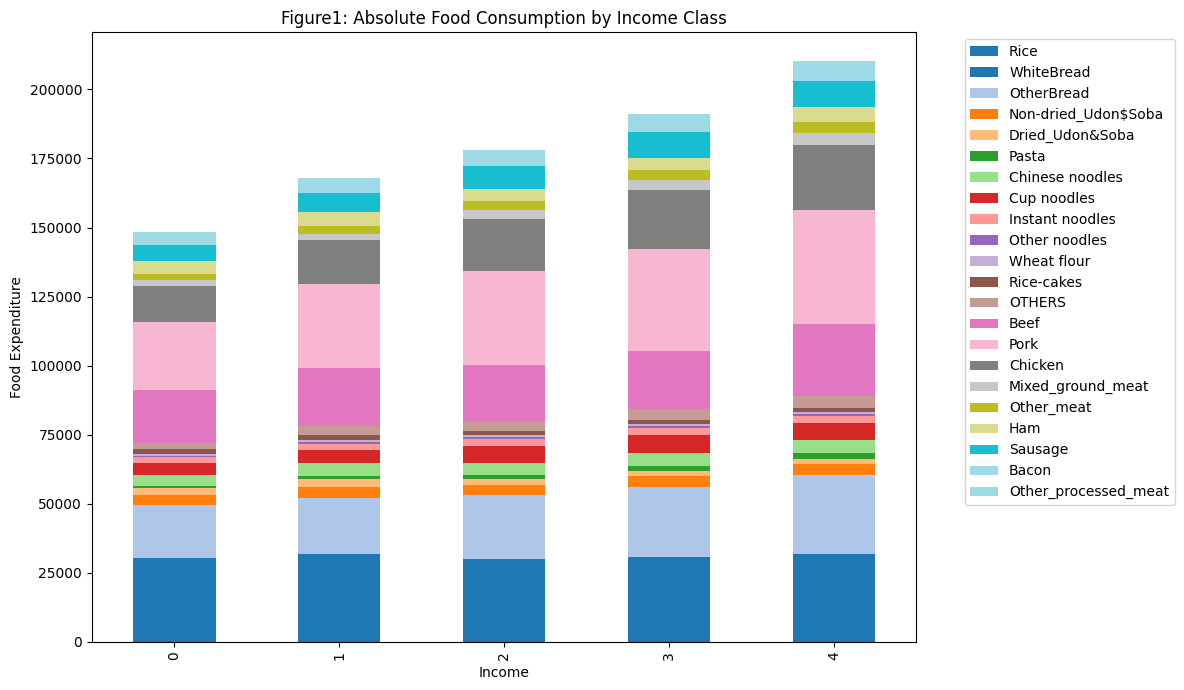

In [70]:
%pip install matplotlib
import matplotlib.pyplot as plt
# Draw the Bar figure
food_data.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')
plt.title('Figure1: Absolute Food Consumption by Income Class')
plt.xlabel('Income')
plt.ylabel('Food Expenditure')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 2.2 Comparing the differences using proportions

In [66]:
# Caculate the sum of staple food and meat
staple_meat_data = merged_data[['Class']]
staple_meat_data['Staple_Food_Sum'] = merged_data[staple_food_cols].sum(axis=1)
staple_meat_data['Meat_Sum'] = merged_data[meat_cols].sum(axis=1)

# Calculate the mean of staple food and meat by income class
staple_meat_grouped = staple_meat_data.groupby('Class')[['Staple_Food_Sum', 'Meat_Sum']].mean()

# Turn the mean into percentage
staple_meat_percent = staple_meat_grouped.div(staple_meat_grouped.sum(axis=1), axis=0) * 100
staple_meat_percent.to_csv('../processed_data/staple_meat_percent.csv')
staple_meat_percent

/var/folders/dv/_5x4w0t95xb1flj112ms384r0000gn/T/ipykernel_12964/788170489.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  staple_meat_data['Staple_Food_Sum'] = merged_data[staple_food_cols].sum(axis=1)
/var/folders/dv/_5x4w0t95xb1flj112ms384r0000gn/T/ipykernel_12964/788170489.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  staple_meat_data['Meat_Sum'] = merged_data[meat_cols].sum(axis=1)


,Staple_Food_Sum,Meat_Sum
Class,,
Ⅰ,48.592400,51.407600
Ⅱ,46.436355,53.563645
Ⅲ,44.863685,55.136315
Ⅳ,44.104822,55.895178
Ⅴ,42.429794,57.570206


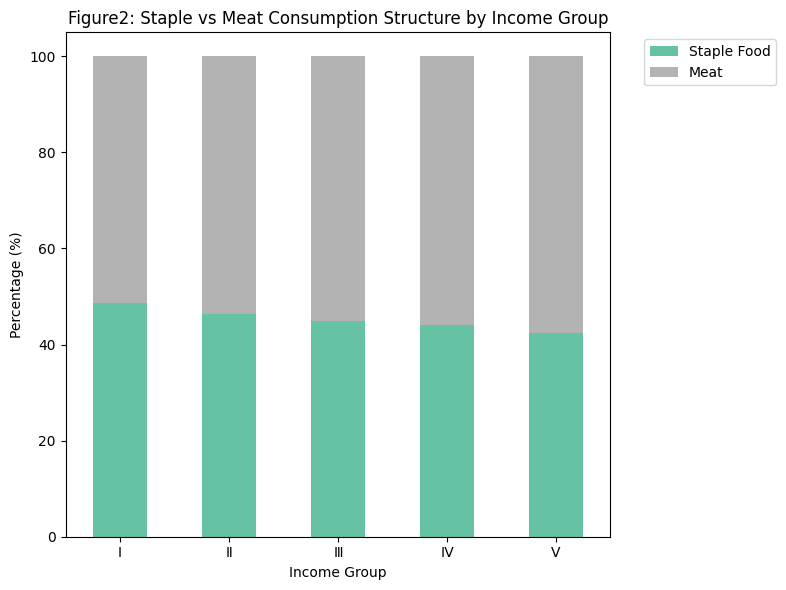

In [61]:
# Plot percentage stacked bar chart
staple_meat_percent.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')
plt.title('Figure2: Staple vs Meat Consumption Structure by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(["Staple Food", "Meat"], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## **3. Description of Demographic Characteristics**

In [62]:
# list the demographic data to see the potential influence on the food consumption
demo_cols = ['Class', 'Income', 'Number_of_Household', 'Number_of_People', 'Number_of_Labor', 'Age_of_Head']
demo_data = merged_data[demo_cols]
demo_data

,Class,Income,Number_of_Household,Number_of_People,Number_of_Labor,Age_of_Head
0,Ⅰ,"( 0,000,000 ～ 3,330,000 )",1512,2.29,0.52,72.0
1,Ⅱ,"( 3,330,000 ～ 4,700,000 )",1501,2.55,0.90,67.2
2,Ⅲ,"( 4,700,000 ～ 6,390,000 )",1456,3.05,1.54,56.3
3,Ⅳ,"( 6,390,000 ～ 8,640,000 )",1437,3.26,1.76,52.9
4,Ⅴ,"( 8,640,000 ～ 0,000,000 )",1353,3.32,1.96,52.8


## **4. Conclusion**
First, it can be concluded from Figure 1 that households in Japan increase their food consumption as their income rises. This is likely due to the additional income available in the household budget. However, it can also be observed that demographic characteristics in higher income classes change, indicating that other factors, such as household size, may also contribute to the increase in food expenditure.

Second, from Figure 2, it can be seen that the proportion of staple food expenditure is relatively higher in upper income classes, while it is lower in lower income classes. This supports Bennett's Law, which suggests that as income increases, the proportion of income spent on staple foods decreases.
